# Week 4 Prework

## Coding Tips
1. Coding: Patsy, Train-Test-Split, GridSearchCV, GradientDescent, Cross Validation, Feature Selection, cPickle, Pipeline
2. Machine Learning: Fix the Code!

## Prework Tuesday
1. Classification Models
2. kNN (K-Nearest Neighbors) with sklearn
3. Confusion Matrix

## Prework Thursday
1. Logistic Regression with sklearn
2. Sigmoid Function, odds and odds ratio
3. ROC/AUC

<span style='font-size:2.5em;color:blue'>Coding Tips</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Patsy

Patsy is a simple way to split your data up into target and predictor values. It is very similar to statsmodel's OLS parameter formula. It is a handy way to add/remove features with ease. The generic formula of how to use patsy is below:

```
formula = 'target ~ predictor1 + predictor2 + predictor3 + predictor4 ... + predictor100 - 1'
y, X    = patsy.dmatrices(formula, df=df, return_type='dataframe')
```

Since patsy changes y into a 2D array/dataframe, you have to change y into a 1D array/list. There are several ways to do it shown below.

```
y = y.values.ravel()
y = df['target']
```

Next, I'll show you an example below on how to use patsy.

In [2]:
import patsy

In [5]:
df = pd.read_csv('review_datasets/bikeshare.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
formula = 'registered ~ temp + hum'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')

In [6]:
# y is now a 2D dataframe, we need to squish it back into a 1D array/list
y.head()

,registered
0,13.0
1,32.0
2,27.0
3,10.0
4,1.0


In [7]:
y = y.values.ravel()
y

array([ 13.,  32.,  27., ...,  83.,  48.,  37.])

In [8]:
X.head()

,Intercept,temp,hum
0,1.0,0.24,0.81
1,1.0,0.22,0.80
2,1.0,0.22,0.80
3,1.0,0.24,0.75
4,1.0,0.24,0.75


### Train_Test_Split
Train-Test split is one of the most important tools to use when running any modeling. It breaks down our entire dataset into 2 sections, a training set and a testing set. We use the training set to train our model with an algorithm and then use that algorithm to run on our testing set to make sure that our results is consistent and stable. Another way to think about it is this.

We have 100 rows of data. Usually, we want the training set to be much larger than the testing set. I usually use 75-25 split. We will allocate 75% of the data to the training set (completely at random) and 25% of the data to the testing set (whatever is left).

It would be a decent 5-7 liner of code if we had to write a training/test function each time, but sklearn's package comes with a train_test_split function!

```
from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75) # Can also use test_size
print trainX.shape, testX.shape
print trainY.shape, trainY.shape
# trainX and testX should be a data from like (1000,15)
# trainY and testY should be a 1D array or list like (1000,)
```

Another thing to mention that sklearn's train_test_split offers is stratify, which we will use for classification problems. Suppose our target variable is categorical with 0s and 1s, it would be problematic if our train_test_split put all the 0s or all the 1s in the training set with none in the testing set. Stratifying makes sure that there's an equal amount in the training set and the testing set!

Below is an example!

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
# Continuing from where we left off in patsy!
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(13034, 3) (4345, 3)
(13034,) (4345,)


### GridSearchCV

GridSearchCV is just Grid Search Cross Validation. The goal of GridSearching is to optimize our parameters.

Below is a continuation from our train_test_split.

In [11]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression

In [12]:
# First, we setup our GridSearch parameters for our linear regression
search_parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Initialize a blank model object
lr = LinearRegression()

# Initialize gridsearch! Verbose shows you what is happening in text.
estimator = GridSearchCV(lr, search_parameters, cv=5, verbose=1, n_jobs=4)

# Fit the data from our train_test_split
results = estimator.fit(trainX, trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.5s finished


In [13]:
results.best_score_

0.17629998247235806

In [14]:
results.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [15]:
results.best_params_

{'fit_intercept': False, 'normalize': True}

### Gradient Descent
Generally speaking, Gradient Descent is a tool to optimize your coefficients and score. How I imagine it is if you put a ping pong ball in a bowl and let it roll, the ball will end up near the center of the bowl.

There are 2 types of Gradient Descent: Batch Gradient Descent and Stochastic Gradient Descent
1. Batch Gradient Descent - BGD does the gradient descent on the whole dataset. As you can imagine, this will take a long time! BGD always takes the steepest route to reach the true input distribution. In practice, nobody uses Batch Gradient Descent because it is too computationally expensive for little gain, but it is good to know what it is.
2. Stochastic Gradient Descent - SGD computes the gradient by using a single sample. As you can imagine, with a single sample there will be more noise, but doing SGD in minibatches (multiple samples), the gradient can be jerked out of local minimum and into the global minimum. SGD choose a random point and then routes to the steepest gradient. SGD is computationally faster.

Below is an example of how to use SGD.
```
from sklearn.linear_model import SGDRegressor

sgd_params = {
    'loss':['squared_loss'],
    'penalty':['l1','l2'],
    'alpha':np.linspace(0.01, 10000, 100)
}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=5, verbose=2)
```

Gradient Descent uses GridSearchCV to find the most optimized parameters.

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [17]:
# A necessary step when performing regularization, must be normalized
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [18]:
trainX_n, testX_n, trainY, testY = train_test_split(Xn, y, train_size=0.75)
print trainX_n.shape, testX_n.shape
print trainY.shape, testY.shape

(13034, 3) (4345, 3)
(13034,) (4345,)


In [19]:
# Set SGD params. How to optimize the param will be experience, so it is good to play around with it
sgd_params = {
    'loss':['squared_loss'],
    'penalty':['l1', 'l2'], # L1 is Lasso, L2 is Ridge
    'alpha':np.linspace(0.01, 10000, 100)
}

# Initialize a blank model object
sgd_reg = SGDRegressor()

# Initialize GridsearchCV params
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=5, verbose=1)

# Fit data
sgd_results = sgd_reg_gs.fit(trainX_n, trainY)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.6s finished


In [20]:
sgd_results.best_score_

0.17623766374150396

In [21]:
sgd_results.best_params_

{'alpha': 0.01, 'loss': 'squared_loss', 'penalty': 'l1'}

In [22]:
sgd_results.best_estimator_

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

### Cross Validation

I think visually, this might make more sense.
```
First iteration  = [Train, Train, Train, Train, Test]
Second iteration = [Train, Train, Train, Test, Train]
Third iteration  = [Train, Train, Test, Train, Train]
Fourth iteration = [Train, Test, Train, Train, Train]
Fifth iteration  = [Test, Train, Train, Train, Train]
```
The data will be broken into 5 chunks and every 25% chunk will get a chance to be the testing set.

In [23]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [27]:
# Create a new empty object with the best parameters from GridSearchCV
sgd_reg_model = SGDRegressor(alpha=0.01, loss='squared_loss', penalty='l1')

# Find the MSE and the mean of all 10 MSE
scores = cross_val_score(sgd_reg_model, Xn, y, cv=10)
print 'Cross-validated scores:', scores
print 'Mean Scores: ', scores.mean()

Cross-validated scores: [-2.05097003  0.13211683 -0.41243034  0.13621148  0.15253103  0.12306541
  0.13618299  0.14594892  0.01161357 -0.01279235]
Mean Scores:  -0.163852249449


<span style="color:red">Just FYI, my model above sucks</span>

### Feature Selection
Feature Selection is looking at the individual weights for each feature and seeing their relationship with the target variable. The closer to 0, the weaker the effect of the predictor feature is. The higher in positive or negative value (goes either way), the stronger the feature has a relationship with the target.

In [25]:
# SGD feature importance results
# Create a feature and their importances (coefficients) in a dataframe
feature_importance = pd.DataFrame({'feature':X.columns, 
                                   'importance':sgd_results.best_estimator_.coef_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
1,temp,47.891122
0,Intercept,0.000000
2,hum,-40.015001


In [26]:
# Linear Regression feature importance results
# Create a feature and their importances (coefficients) in a dataframe
feature_importance = pd.DataFrame({'feature':X.columns, 
                                   'importance':results.best_estimator_.coef_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
1,temp,248.432124
0,Intercept,155.684692
2,hum,-199.797983


### cPickle
cPickle is one of the greatest packages ever. Think of it as a .zip/.rar/.7z file for pandas! It was one of the tools I used frequently when I was working on my capstone. I had to run 6 Random Forests on 6 different target variables. Let's just say that the algorithm was about 1gb each and took 5 hours each to run once on my laptop. So, how did cPickle save me? I wrote a modeling script, which I uploaded into an AWS EC2 instance. I saved all my data as a .pickle file and uploaded it into the AWS instance. Also in my script, I wrote a save .Pickle file to save my GridSearch information. I didn't have to move any csvs or data cleaning, just a .pickle file. Below is what I did for 1 target variable.

<span style="color:red">Don't Run the Code Below, it won't work! It is just an example of how I used cPickle.</span>

##### Saved all my cleaned trainX and trainY and 'wb', which is write, into a .pickle file.

In [ ]:
import cPickle as pickle
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/trainX_agg.pickle', 'wb') as f:
    pickle.dump(trainX_agg, f)
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/trainY_agg.pickle', 'wb') as f:
    pickle.dump(trainY_agg, f)

##### The script I ran on my AWS EC2 instance.

In [ ]:
import cPickle as pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np

with open('/home/ubuntu/modeling/pickle_input/trainX_agg.pickle', 'rb') as f:
    trainX = pickle.load(f)
with open('/home/ubuntu/modeling/pickle_input/trainY_agg.pickle', 'rb') as f:
    trainY = pickle.load(f)

forest = RandomForestRegressor()

params = {'max_depth':[2,3,4,5,6,None], 
          'max_features':['auto'],
          'min_samples_split':[2,4,8,16,32,64,128,256],
          'n_estimators':[500],
          'criterion': ['mse']
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5, verbose=1) 

model = estimator_rfr.fit(trainX, trainY)

with open('/home/ubuntu/modeling/pickle_output/model_agg.pickle', 'wb') as f:
    pickle.dump(model, f)

##### Opened the finished GridSearch algorithm back into my jupyter notebook for analysis

In [ ]:
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_agg.pickle', 'rb') as f:
    rf_model_agg = pickle.load(f)

Very helpful tool, the AWS instance ran 6 Random Forests in 5 hours, whereas on my laptop, it would have taken 30 hours. Definitely a good tool to save your work at certain points, so you don't have to re-clean everything again.

### Pipeline
I've never used pipeline before because I usually forget, but it is a very nifty tool. Pipelines allow you to chain steps together so you don't have to write/run the same code on different datasets. Below is an example of how to use pipeline.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [29]:
# Initialize your empty objects
ss = StandardScaler()
lr = LinearRegression()

In [30]:
# Setup the Pipeline to help you run Lasso
lr_pipeline = Pipeline(steps=[['scaler', ss], ['linear', lr]])

In [36]:
affair = pd.read_csv('review_datasets/affair.csv')
affair.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [38]:
X = affair[['age', 'ym', 'religious', 'education', 'occupation', 'rate']]
y = affair.nbaffairs.values

In [39]:
model = lr_pipeline.fit(X, y)
print model

Pipeline(steps=[['scaler', StandardScaler(copy=True, with_mean=True, with_std=True)], ['linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)]])


In [40]:
predictions = model.predict(X)
score = model.score(X, y)
print score

0.131473134733


<span style='font-size:2.5em;color:blue'>Fix the Code!</span><p>
One of the best ways to learn how to code is to break your code, read the error, fix it and break it again. Jupyter notebook is great for breaking your code because worse comes to worse, you can just re-run everything above and try again. Below is a couple of easy fixes that will help you look at what is wrong!

The Goal: It needs to be automatic that you can look at the error and identify what is happening. Practice reading errors and documentations.

##### If you guys like this format, I can think of a couple more difficult ones with modeling

In [16]:
df = np.read_csv('review_datasets/college-majors.csv')

In [17]:
df.shape()

TypeError: 'tuple' object is not callable

In [18]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [19]:
df['P25th'].groupby('P25th')['Employed', 'Unemployed']['P25th']

KeyError: 'P25th'

In [20]:
df.plot(x='Employed', y='Unemployed')

In [21]:
df.plot(x='Major', y='Unemployment_rate', kind='bar')

<span style='font-size:2.5em;color:blue'>Prework - Tuesday</span>

### Classification Models
Classification Models are models predicting categorical variables. For example, with given predictor variables, is the next person a male or female? Is the next pet animal a dog or a cat?

Here are some classification models:
1. kNN (k-Nearest Neighbors)
2. Logistic Regression
3. Decision Tree Classifier
4. Support Vector Classifier
5. Naive Bayes Classifier

We will start with the most basic classifier, kNN.

### kNN (k-Nearest Neighbors) with sklearn

kNN is a lazy model classifier. It runs very fast and efficient, but not very intuitive.

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights=['uniform', 'distance'])
```

It only has 2 parameters, which you can play around with.
1. n_neighbors - If n_neighbors=5, then based on old data and where the new point lies in the old data, the closest 5 data points will decide what the new data point is. Generally speaking, you want this to be an old number.
2. weights - if n_neighbors=5, Uniform says that each one of those points, regradless if they are categorical value 0 or 1, they are all equal. Distance says that the closer the points are to the new data point, kNN puts a heavier weight value (euclidean distance) on those points.

It might be easier visualizing it:
http://3.bp.blogspot.com/-ZslDMqm5M9o/T8ja_f_fALI/AAAAAAAAAt4/z7w55YAZXpw/s1600/p1.png

Below is an example of kNN, I used an affair dataset, which I put in the review and prework folder called review_datasets. I will put datasets I used exclusive from Reid's dataset folder.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
affairs = pd.read_csv('review_datasets/affair.csv')
affairs.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
affairs.head(3)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.0,no,3,18,7,4,0
1,female,27.0,4.0,no,4,14,6,4,0
2,female,32.0,15.0,yes,1,12,1,4,0


In [44]:
# First, we need sex, child and nbaffairs (number of affairs) into categorical values.
# I'll show you 2 ways of doing it.

# Write a function that whenever number of affairs == 0, that person didn't have affairs and any number greater
# than 1 equates to having an affair
def binary_affair(x):
    if x == 0:
        return 0
    else:
        return 1

# No need to write any loops because when you data[series].map(function), the .map will take each value 1 by 1,
# like a loop.
affairs['had_affair'] = affairs['nbaffairs'].map(binary_affair)

# Since we don't need to create new columns for sex and child, we can just replace the values into 0 and 1.
affairs['sex'] = affairs.sex.map(lambda x: 1 if x == 'male' else 0)
affairs['child'] = affairs.child.map(lambda x: 1 if x == 'yes' else 0)

In [45]:
affairs.head(3)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,had_affair
0,1,37.0,10.0,0,3,18,7,4,0,0
1,0,27.0,4.0,0,4,14,6,4,0,0
2,0,32.0,15.0,1,1,12,1,4,0,0


In [46]:
x = affairs[['age', 'religious']]
y = affairs['had_affair'].values

In [47]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

knn_model = knn.fit(x, y)
knn_predict = knn_model.predict(x)
knn_score = knn_model.score(x, y)
knn_score

0.76039933444259566

#### What I did above was a basic run through with zero optimization or any way to test my model. Practice below to see if you can better optimize the score!

### 1. Train-Test Split

### 2. GridSearchCV

### 3. kNN Modeling

### 4. Cross Validation

### Confusion Matrix

For all classification results, the most useful tool to look at is a confusion matrix. Confusion matrix is similar to when we were talking about Type 1 and Type 2 errors. The confusion matrix looks something like this: http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png

How do we use a confusion matrix to see how well our model is doing? There are a couple of simplistic formulas we can do to help us figure out how well our model did.

*** number of test examples*** _n_ = _tp_  +  _tn_  +  _fp_  +  _fn_ 

***Accuracy:*** In general how often is the classifier correct? => ( _tp_ + _tn_ )  /  _n_

***Misclassification Rate (Error Rate):*** How often is the model wrong =>   _fp_ + _fn_ / _n_
 
***Precision:*** When the model predicts "yes", how often is it correct? => _tp_ / ( _tp_  +  _fp_ )

***Recall / True Positive Rate:*** How often the model predicts yes, when it's actually yes => _tp_ / ( _tp_ + _fn_ )

The good thing is, sklearn provides us with almost all of these information and a confusion matrix :)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### I will be performing a classification report and a confusion matrix with the simple kNN I did.

In [49]:
print classification_report(y, knn_predict, target_names=['no affair', 'had affair'])

             precision    recall  f1-score   support

  no affair       0.76      1.00      0.86       451
 had affair       0.88      0.05      0.09       150

avg / total       0.79      0.76      0.67       601



##### Why is there f1-score and support?!

```
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
```

1. F1-Score is the harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once.

2. Support is simply the number of observations for each class

In [50]:
print confusion_matrix(y, knn_predict)

[[450   1]
 [143   7]]


In [51]:
# Accuracy
acy = (450. + 7) / 601
print acy

0.760399334443


In [52]:
# Error
mis = (143. + 1) / 601
print mis

0.239600665557


##### This below code is half borrowed, half edited (mainly to get the tickmarks to not screw up when the target value is not a binomial distribution). Feel free to use it.

Confusion matrix, without normalization
[[450   1]
 [143   7]]


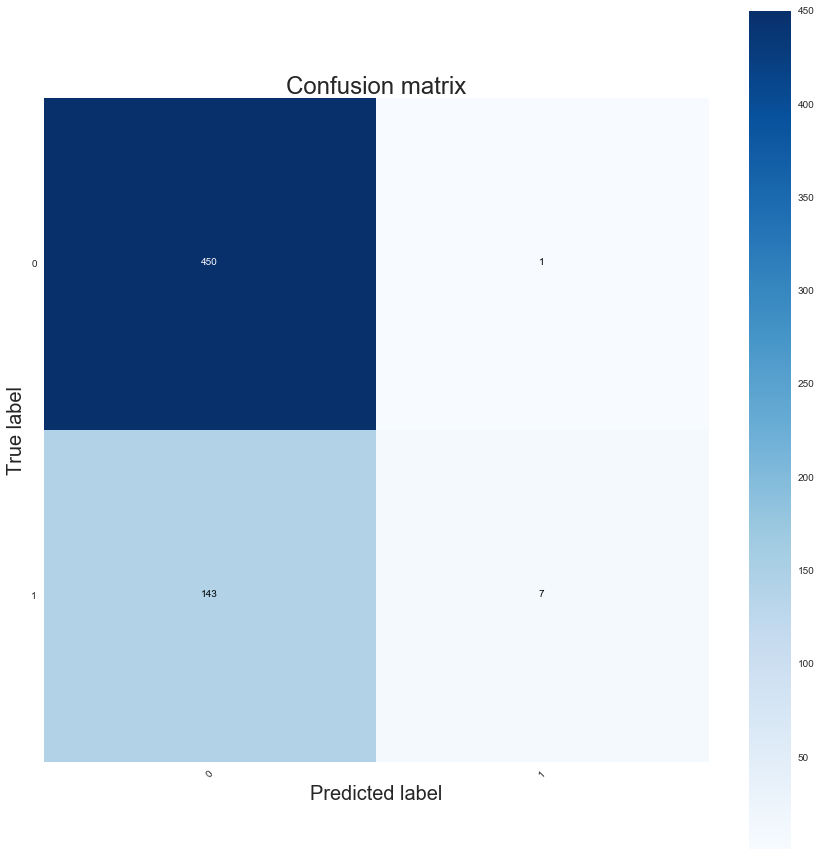

In [53]:
import itertools
from itertools import cycle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

cnf_mtx = confusion_matrix(y, knn_predict)
class_names = affairs['had_affair'].unique()

plot_confusion_matrix(cnf_mtx, classes=class_names,
                      title='Confusion matrix')

plt.show()

### 5. Write your own classification report and confusion matrix on your optimized model. Is your model doing a good job?

<span style='font-size:2.5em;color:blue'>Prework - Thursday</span>

### Logistic Regression with sklearn
Logistic Regression is a classifier used when the target/outcome/dependent variable is categorical (0,1). For most simple cases, the dependent variable will only have 2 outcomes, alive/dead, male/female, pass/fail, win/lose, etc... However, logistic regression can also be used if the dependent variable has multiple outcomes, such as big/medium/small, up/down/left/right, etc... we call these multinomial logistic regression.

The goal of a logistic regression is to use independent variable(s) and predicting the probability if the dependent variable will be 0 or 1. For example, the Sigmoid (S-shaped graph) shows the probability of passing or failiing a test depending on how much studying you do: https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg

A Logistic Regression's syntax:
```
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
```

Since it is better to practice, try running a logistic regression!

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
affair = pd.read_csv('review_datasets/affair.csv')
affair.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [6]:
affair.isnull().sum()

sex           0
age           0
ym            0
child         0
religious     0
education     0
occupation    0
rate          0
nbaffairs     0
dtype: int64

In [7]:
affair.nbaffairs.unique()

array([ 0,  3,  7, 12,  1,  2])

In [8]:
# This will be a categorical target variable
affair['had_affairs'] = affair.nbaffairs.map(lambda x: 0 if x == 0 else 1)

<span style="color:red; font-family:Georgia; font-size:1.5em;">Don't copy and paste. Look up documentations and try to create the code. Don't read stackoverflow, it ends up being copying and pasting. Breaking codes and creating errors is the best way to learn how to code. The more errors you make, the better you'll be.</span>

### As done above, change sex and child to 0 and 1 categorical values

### Using Patsy
Make your target variable had_affairs, you choose your predictor variables

### train_test_split
Create a training set and a testing set. Play around with different percentages to see how your model changes. Also, remember to stratify=y in the parameter so that there is an even split of 0 and 1s in the training and testing sets.

### Run a Logistic Regression
So, here's a general explanation on how the training and testing set work.

If you want to see how well your training set did:
```
logreg  = LogisticRegression()
model   = logreg.fit(trainX, trainY)
predict = model.predict(trainX)
score   = model.score(trainX, trainY)
```
If you want to see if the training set was not over or underfitting:
```
logreg  = LogisticRegression()
model   = logreg.fit(trainX, trainY)
predict = model.predict(testX)
score   = model.score(testX, testY)
```

### Create a Confusion Matrix and Classification Report

Is your model predicting well? If not, how would you improve it?

### Sigmoid Graph and Odds Ratio

Sigmoid Graphs are log function graphs (creates an S shape like this: https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png). Although it looks like it is on 0 and 1, it is actually never reaching 0.0 or 1.0. It'll go on to infinity.

Below is the equation for Odds Ratio:
### $$\text{odds ratio}(p) = \frac{p}{1-p}$$
So, what does that mean? Well, Odds Ratio and probability represent the same thing, but in a different way. The easiest way to think about Odds Ratio is betting returns!

If something has a 50% chance of happening, then the Odds Ratio is 1. Which means, if you put in 1 dollar, you'll get 1 dollar back!

Below is an example of visualizing Sigmoid Graph and why Odds Ratio is useful!

In [63]:
# This is a simple dataset of a student being admitted to a master's degree program or not
admissions = pd.read_csv('review_datasets/admissions.csv')

In [64]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [65]:
admissions.shape

(400, 4)

In [66]:
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [67]:
admissions.dropna(inplace=True)

In [68]:
# Basically, since we only want to see the most prestigious people, we need to create and emulate more rows
admit = admissions[admissions.prestige == 1]

admit = pd.concat([admit]*10, axis=0)

admit.loc[admit.admit == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])
admit.loc[admit.admit == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

In [69]:
admit.shape

(610, 4)

In [70]:
y = admit.admit.values
X = admit[['gpa']].values

In [71]:
logreg = LogisticRegression()
logreg.fit(X, y)

print 'Intercept: ', logreg.intercept_
print 'Coefficients: ', logreg.coef_
print 'Logreg predicted probabilities: ', logreg.predict_proba(X)

Intercept:  [-8.19]
Coefficients:  [[ 2.45]]
Logreg predicted probabilities:  [[ 0.03  0.97]
 [ 0.27  0.73]
 [ 0.73  0.27]
 ..., 
 [ 0.29  0.71]
 [ 0.26  0.74]
 [ 0.86  0.14]]


In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# Calculating the baseline, when the probability of being admitted and rejected are both 50%
# The reason why you need a baseline is because if your model predicts close to a 50-50 chance, then your model
# is no better than if you flipped a fair coin

xval_chance = (-1 * logreg.intercept_[0])/logreg.coef_[0][0]
print 'predicted_y_value = 0: ', xval_chance*logreg.coef_[0][0] + logreg.intercept_
print 'GPA when admit/reject is 50/50: ', xval_chance

print 'Check probability: ', logreg.predict_proba(xval_chance)

# Having the baseline is important because we can plot it!

predicted_y_value = 0:  [ 0.]
GPA when admit/reject is 50/50:  3.34439837064
Check probability:  [[ 0.5  0.5]]


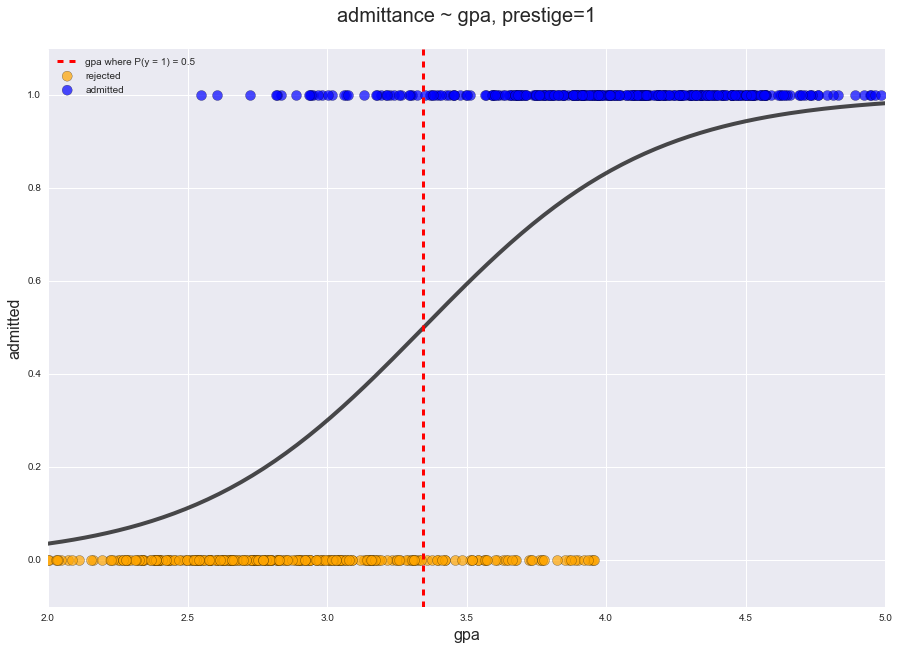

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

# plot the logreg regression line for admit ~ gpa
x_vals = np.linspace(-1.,5.,300)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# A scatter plot for each type of category
ax.scatter(admit.gpa[admit.admit == 0],
           admit.admit[admit.admit == 0],
           c='orange', s=100, alpha=0.7,
           label='rejected')

ax.scatter(admit.gpa[admit.admit == 1],
           admit.admit[admit.admit == 1],
           c='blue', s=100, alpha=0.7,
           label='admitted')

# Plotting the baseline value!
ax.axvline(xval_chance, lw=3, color='red', ls='dashed',
           label='gpa where P(y = 1) = 0.5')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)

ax.set_xlim([2.,5.])
ax.set_ylim([-0.1, 1.1])

plt.legend(loc='upper left')
plt.show()

#### Interpreting your coefficients can be counter-intuitive, so we will use log odds. How?
1. We will need to center the predictor values. Centering helps a lot because now the "baseline" for the predictor, the value at 0, is the mean of the predictor. So, in our case, when gpa = 0 this is the average gpa across students.
2. Re-run our Logistic Regression!

In [75]:
X_center = X - X.mean()
print X_center[0:5,:]

[[ 1.35]
 [ 0.28]
 [-0.54]
 [ 1.21]
 [ 0.84]]


In [76]:
logreg2 = LogisticRegression()
model2  = logreg2.fit(X_center, y)

print 'Intercept: ', model2.intercept_[0]
print 'Coefficients: ', model2.coef_[0][0]

Intercept:  0.299075852644
Coefficients:  3.80100777577


The combination of converting the probability to an odds ratio and taking the logarithm of that is called the **logit link function**, and is what Logistic Regression uses to estimate probability:

##### If you are wondering about the equation, you can find it through wikipedia and other sites

In [77]:
def logistic_transformation(gpa, b0, b1):
    regression_sum = b0 + b1*gpa
    exponentiated = np.exp(regression_sum)
    return exponentiated / (1 + exponentiated)

In [78]:
print 'average gpa:', np.mean(X[:,0])
print 'P(admitted | average gpa = 3.49):', logistic_transformation(0, model2.intercept_[0], model2.coef_[0][0])

average gpa: 3.4811605744
P(admitted | average gpa = 3.49): 0.574216585782


In [79]:
print 'gpa = 2.5, difference from mean:', 2.5 - np.mean(X[:,0])
print 'P(admitted | gpa = 2.5):', logistic_transformation(2.5 - np.mean(X[:,0]), 
                                                          model2.intercept_[0], model2.coef_[0][0])

gpa = 2.5, difference from mean: -0.981160574399
P(admitted | gpa = 2.5): 0.0313611151551


In [80]:
print 'gpa = 4, difference from mean:', 4 - np.mean(X[:,0])
print 'P(admitted | gpa = 4):', logistic_transformation(4. - np.mean(X[:,0]), 
                                                        model2.intercept_[0], model2.coef_[0][0])

gpa = 4, difference from mean: 0.518839425601
P(admitted | gpa = 4): 0.906462610877


### ROC / AUC

Response Operating Curve/Receiver Operating Characteristic and Area Under the Curve are the official names. I will explain it in more detail on what it does later.

Below is a function I wrote a while back that does train_test_split, Logistic Regression and plotting a ROC curve.

trainX shape:  (427, 1) 
testX shape: (183, 1)
trainY shape:  (427,) 
testY shape: (183,)
Model Score:  0.874316939891


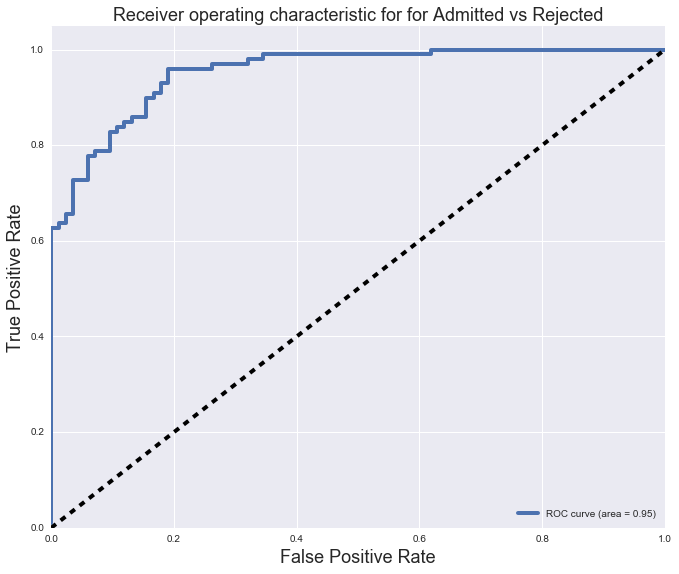

In [81]:
from sklearn.metrics import roc_curve, auc

def logistic_regression_calculation(predictors, target, title='Your Prediction'):
    
    ### Test-Train split 70-30
    trainX, testX, trainY, testY = train_test_split(predictors, target, train_size=0.7, stratify=target)
    print 'trainX shape: ', trainX.shape, '\ntestX shape:', testX.shape
    print 'trainY shape: ', trainY.shape, '\ntestY shape:', testY.shape
    
    ### Setup LogisticRegression modeling
    # Create LogisticRegression function cross validated 5 times
    logreg = LogisticRegression()
    # Fit the data points into the LogisticRegression model
    model = logreg.fit(trainX, trainY)
    # Predict Probability
    probabilities = model.predict_proba(testX)
    # Score the model
    score = model.score(testX, testY)
    print 'Model Score: ', score
    
    ### Plot the data
    # Creating a blank set of objects to store my confusion matrix metrics here
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
    # .predict_proba() predictions
    # This data is what will be plotted once we throw it to our figure
    FPR[1], TPR[1], _ = roc_curve(testY, probabilities[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # 1. Initialize a blank plot, aspect 11x9
    plt.figure(figsize=[11,9])
    # 2. Plot my false and true rates (returned from roc_curve function)
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    # 3. Plotting a dotted line diagonally, representing the .5
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for %s' %title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_calculation(X, y, title='for Admitted vs Rejected')

The ROC/AUC curve plots the True Positives vs False Positive. The dotted line is the baseline, which is 50% (area = 0). In order for your model to be predicting well, you need a high area between the curve and the baseline. A good model will have a positive area, while a really bad model will have a negative area.

We want to limit the false positives because we don't want our model to cause Type II errors.

## Create a Classification Report and Confusion Matrix and see how it relates with the ROC/AUC curve above. Is this a good model?

<span style="color:red; font-family:Georgia; font-size:1.5em;">Again, try to remember what the imports are and read the documentation for the parameters.</span>